<a href="https://colab.research.google.com/github/AUMANSH/Data-Science-Projects/blob/main/lstm%2Bcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

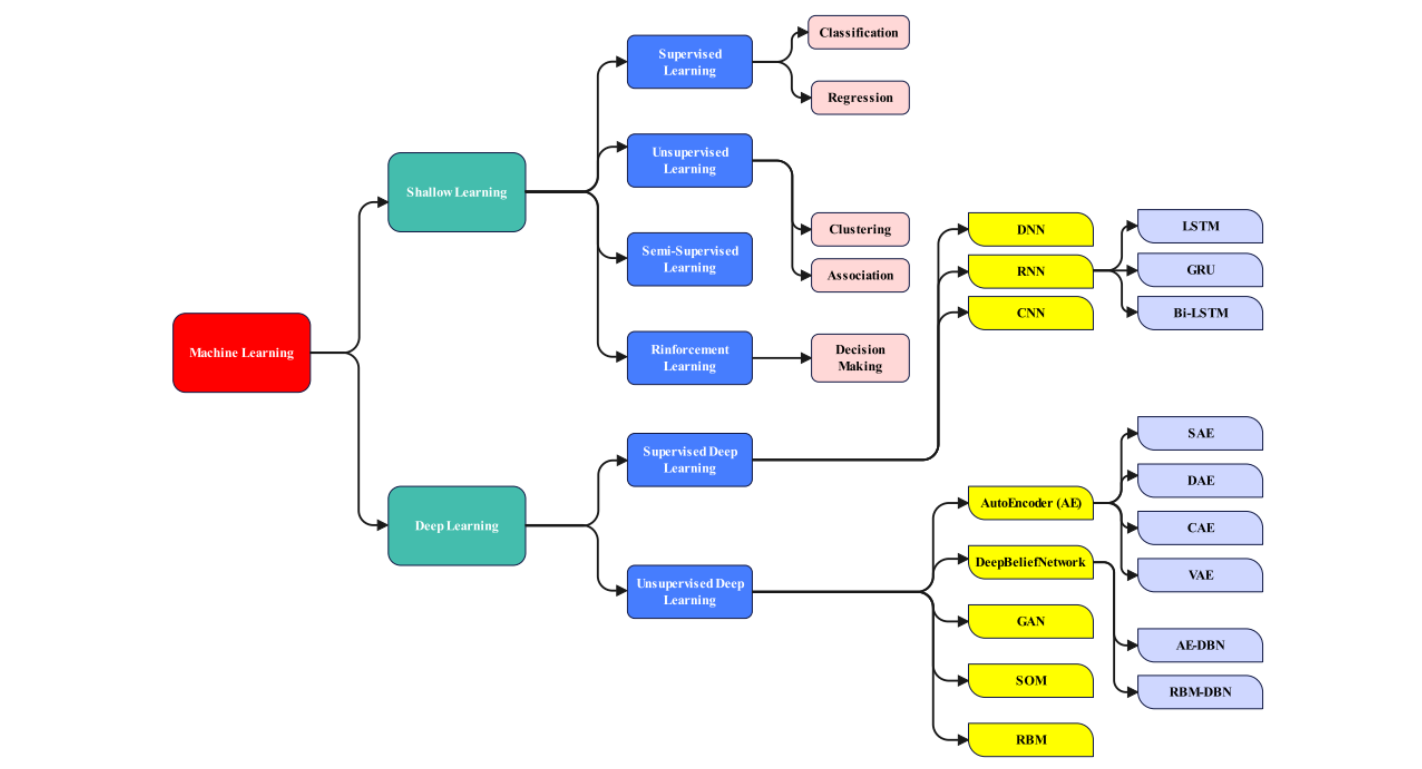

There has been an increase in ransomware attacks, which have become a severe cybersecurity concern, causing substantial financial and operational losses in many sectors. These cannot usually detect sophisticated and evolving ransomware attacks because they tend to be based on traditional detection methods, such as signature-based and heuristic approaches that are always short-lived. Therefore, this study investigated whether deep learning models and advanced feature engineering techniques could improve ransomware detection. Ransomware attacks have rapidly emerged as one of the most damaging cyber threats, with significant consequences for individuals, corporations, and governments worldwide. As traditional detection methods struggle to keep up with increasingly sophisticated attack patterns, deep learning and feature engineering techniques have shown great potential in improving the detection accuracy of ransomware. This comprehensive review explores recent advances in deep learning models, particularly convolutional neural networks (CNNs), recurrent neural networks (RNNs), autoencoders, and feature engineering techniques that improve ransomware detection. We also highlight challenges, limitations, and future research directions in this evolving domain. This paper emphasizes the significance of feature engineering in deep learning applications, paving the way for future development in cybersecurity. With better findings, we help build more robust, adaptable security solutions through improved capability to detect ransomware.

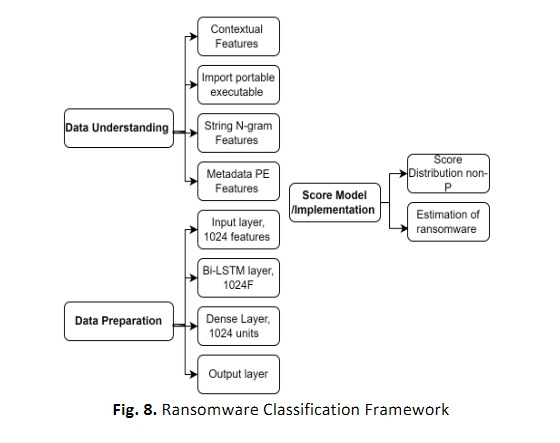

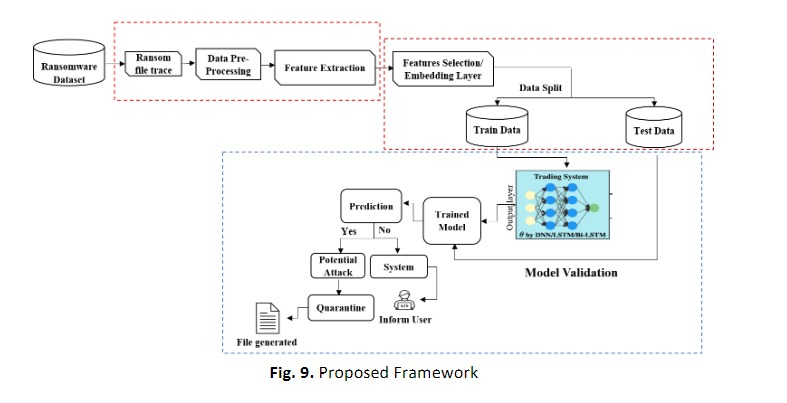

In [12]:
# prompt: merge cnn and lstm

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate



In [13]:
df = pd.read_csv("/content/data_file.csv", on_bad_lines="skip")
df



,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [15]:
X = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values



In [16]:
# Reshape input data for CNN (assuming time series data)
X = X.reshape(X.shape[0], X.shape[1], 1)



In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
# CNN part
cnn_input = Input(shape=(X_train.shape[1], 1))
cnn = Conv1D(filters=32, kernel_size=3, activation='relu')(cnn_input)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)



In [19]:
# LSTM part
lstm_input = Input(shape=(X_train.shape[1], 1))
lstm = LSTM(units=50)(lstm_input)



In [20]:
# Merge CNN and LSTM outputs
merged = concatenate([cnn, lstm])


In [21]:

# Dense layers for classification/regression
dense = Dense(units=32, activation='relu')(merged)
output = Dense(units=1, activation='sigmoid')(dense)  # Adjust activation and units based on your task



In [22]:
# Create the model
model = Model(inputs=[cnn_input, lstm_input], outputs=output)



In [23]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Adjust loss and metrics based on your task



In [24]:
# Train the model
model.fit([X_train, X_train], y_train, epochs=10, batch_size=32, validation_split=0.1)



Epoch 1/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7543 - loss: 75217.5469 - val_accuracy: 0.8088 - val_loss: 3441.5215
Epoch 2/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8398 - loss: 4802.5605 - val_accuracy: 0.7461 - val_loss: 1299.2026
Epoch 3/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8419 - loss: 1401.0803 - val_accuracy: 0.8192 - val_loss: 935.6851
Epoch 4/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8472 - loss: 3279.4502 - val_accuracy: 0.8912 - val_loss: 7286.5508
Epoch 5/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8237 - loss: 3796.6079 - val_accuracy: 0.7642 - val_loss: 8567.8467
Epoch 6/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8302 - loss: 2991.0745 - val_accuracy: 0.8386 - val_loss: 3889.5120
Epoch 7/10
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8310 - loss: 5994.2466 - val_accuracy: 0.8864 - val_loss: 426.0978
Epoch 8/10
1406/1406 ━━━━━━━━━━━━━━

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate([X_test, X_test], y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6552 - loss: 819.6655
Test Loss: 936.6674194335938
Test Accuracy: 0.6535168290138245


In [26]:


from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt


In [27]:

# Get predicted probabilities for the test set
y_pred_prob = model.predict([X_test, X_test])



391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [28]:
# Convert probabilities to binary predictions (e.g., threshold at 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)



In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[3436 3689]
 [ 641 4731]]


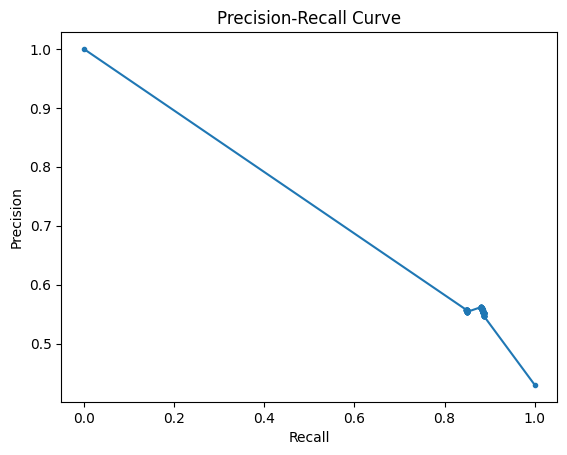

In [30]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

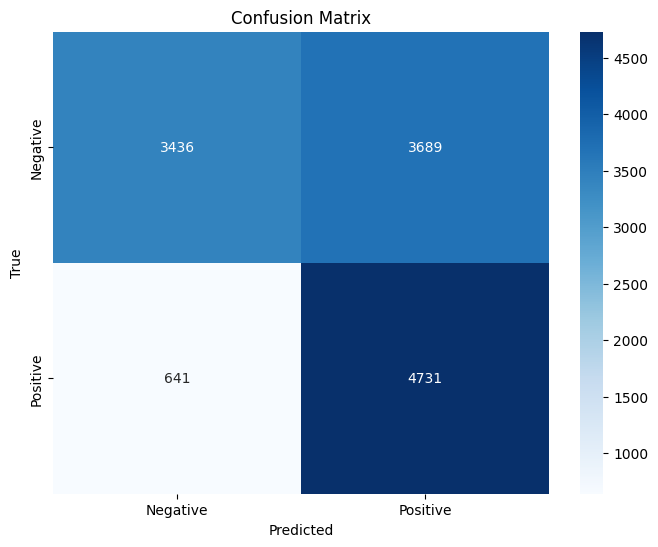

In [31]:


import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.metrics import roc_curve, auc



In [33]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


In [34]:

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)



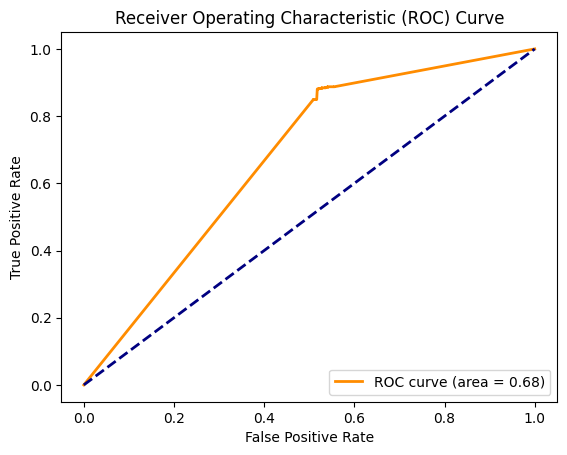

In [35]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()